In [0]:
import numpy as np
import pandas as pd  
from sklearn.feature_selection import SelectFdr,f_classif,SelectKBest,chi2
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
import random
import sklearn as sklea
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import CuDNNLSTM, Dense, Dropout,LSTM
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
import statistics 
from statistics import mode 
from keras.models import load_model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB

**DATASET 1 values are read using pandas**

In [126]:
read_data=pd.read_csv("Copy of cancer patient data sets.csv")
lll=[]
for l in read_data['Level']:
    if l=='Low':
        lll.append(1)
    elif l=='Medium':
        lll.append(2)
    else:
        lll.append(3)
cread_data=read_data.copy()
cread_data['Level']=lll
read_data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


**CORRELATION between different features and target variable 'Level' from datset 1**

In [127]:
corr=cread_data.corr()
corr=corr['Level'][:len(corr['Level'])-1]
corr

Age                         0.060048
Gender                     -0.164985
Air Pollution               0.636038
Alcohol use                 0.718710
Dust Allergy                0.713839
OccuPational Hazards        0.673255
Genetic Risk                0.701303
chronic Lung Disease        0.609971
Balanced Diet               0.706273
Obesity                     0.827435
Smoking                     0.519530
Passive Smoker              0.703594
Chest Pain                  0.645461
Coughing of Blood           0.782092
Fatigue                     0.625114
Weight Loss                 0.352738
Shortness of Breath         0.497024
Wheezing                    0.242794
Swallowing Difficulty       0.249142
Clubbing of Finger Nails    0.280063
Frequent Cold               0.444017
Dry Cough                   0.373968
Snoring                     0.289366
Name: Level, dtype: float64

Stratified K - fold splitting

In [0]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=5)
# for train_index, test_index in skf.split(X, Y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]

In [129]:
first=read_data['Gender'][read_data['Level']=='High']
second=read_data['Gender'][read_data['Level']=='Medium']
third=read_data['Gender'][read_data['Level']=='Low']
third.tolist().count(2) 

154

DISTRIBUTION OF POINTS IN 2-D

5 7 5


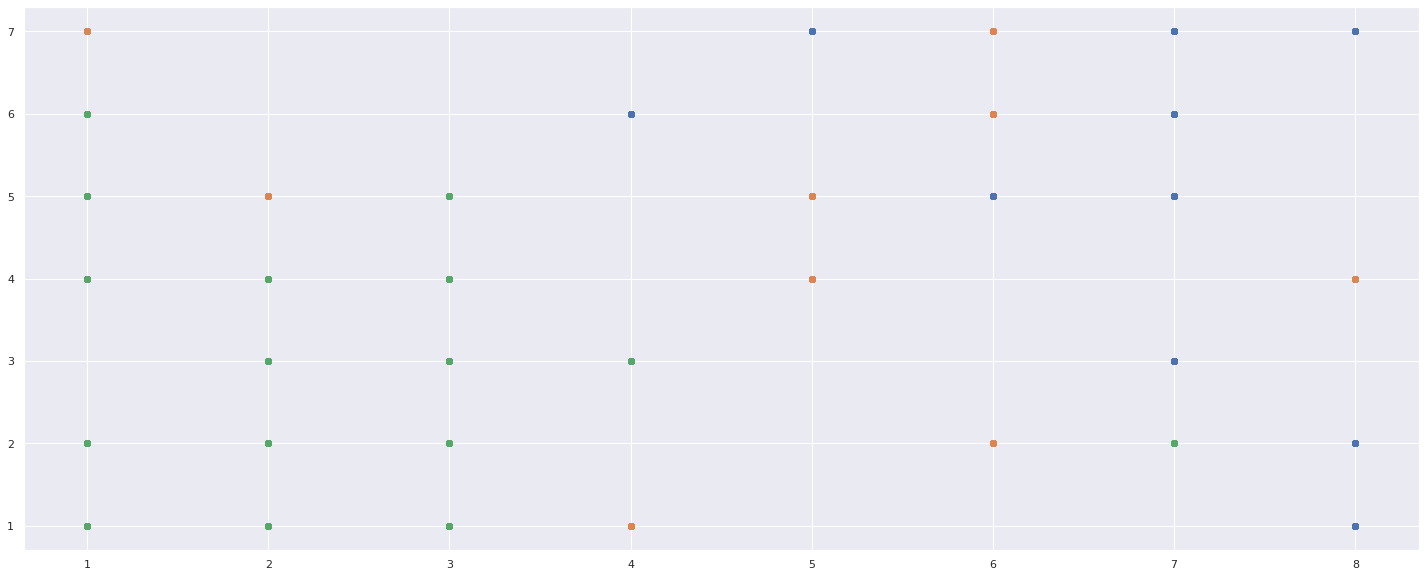

In [130]:
first=read_data['Alcohol use'][read_data['Level']=='High']
fir=read_data['Dry Cough'][read_data['Level']=='High']
second=read_data['Alcohol use'][read_data['Level']=='Medium']
sec=read_data['Dry Cough'][read_data['Level']=='Medium']
third=read_data['Alcohol use'][read_data['Level']=='Low']
thi=read_data['Dry Cough'][read_data['Level']=='Low']
print (len(set(first)),len(set(second)),len(set(third)))
plt.figure(figsize=(25,10))
plt.scatter(first,fir)
plt.scatter(second,sec)
plt.scatter(third,thi)
plt.show()

This function calculates accuracy by taking true and predicted labels as argument

In [0]:
def accuracy_score_calculation(y_true,y_pred):
  return accuracy_score(y_true, y_pred)


This function creates confusion matrix for datset 1

In [0]:
def confusion_matrix_creation(test_y,pred_y,plot_name):
  a=list(test_y)
  b=list(pred_y)
  t=confusion_matrix(a,b)
  df_cm = pd.DataFrame(t,("Low","Medium","High"), ("Low","Medium","High"))
  # plt.figure(figsize=(10,7))
  sns.set(font_scale=1) # for label size
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
  plt.title(plot_name)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return plt

**Dataset Spliting on class basis to maintain uniformity**

In [0]:

Low_data=read_data.loc[read_data['Level'] == 'Low', 'Age':'Snoring']
low_data=np.array(Low_data)
low_data_label=[]
medium_data_label=[]
high_data_label=[]

Medium_data=read_data.loc[read_data['Level'] == 'Medium', 'Age':'Snoring']
medium_data=np.array(Medium_data)
High_data=read_data.loc[read_data['Level'] == 'High', 'Age':'Snoring']
high_data=np.array(High_data)

for i in low_data:
  low_data_label.append(0)
for i in medium_data:
  medium_data_label.append(1)
for i in high_data:
  high_data_label.append(2)


In [0]:
lowtrainx, lowtestx,lowtrainy, lowtesty = train_test_split(low_data,low_data_label, test_size = 0.4, random_state = 0)
mediumtrainx, mediumtestx, mediumtrainy,mediumtesty = train_test_split(medium_data,medium_data_label, test_size = 0.4, random_state = 0)
hightrainx,hightestx,hightrainy, hightesty = train_test_split(high_data, high_data_label, test_size = 0.4, random_state = 0)

In [135]:
print(lowtrainx.shape)
print(lowtestx.shape)
print(mediumtrainx.shape)
print(mediumtestx.shape)
print(hightrainx.shape)
print(hightestx.shape)

(181, 23)
(122, 23)
(199, 23)
(133, 23)
(219, 23)
(146, 23)


Combining all uniformaliy splitted training datset in one and testing datset in one

In [136]:
trainx=[]
testx=[]
trainy=[]
testy=[]
for i in range(0,len(lowtrainx)):
  trainx.append(lowtrainx[i])
for i in range(0,len(mediumtrainx)):
  trainx.append(mediumtrainx[i])
for i in range(0,len(hightrainx)):
  trainx.append(hightrainx[i])
trainx=np.array(trainx)
print(trainx.shape)

for i in range(0,len(lowtestx)):
  testx.append(lowtestx[i])
for i in range(0,len(mediumtestx)):
  testx.append(mediumtestx[i])
for i in range(0,len(hightestx)):
  testx.append(hightestx[i])
testx=np.array(testx)
print(testx.shape)

for val in lowtrainy:
  trainy.append(val)
for val in mediumtrainy:
  trainy.append(val)
for val in hightrainy:
  trainy.append(val)
for val in lowtesty:
  testy.append(val)
for val in mediumtesty:
  testy.append(val)
for val in hightesty:
  testy.append(val)
testy=np.array(testy)
trainy=np.array(trainy)
print(testy.shape)
print(trainy.shape)


(599, 23)
(401, 23)
(401,)
(599,)


**Saving splitted data in pickle for dataset1**

In [0]:
def load_data(d,name):
    dbfile = open(d, 'wb') 
    pickle.dump(name, dbfile)
    dbfile.close()




In [0]:
dic_train={}
dic_test={}
dic_train["trainx"]=trainx
dic_train["trainy"]=trainy
dic_test["testx"]=testx
dic_test["testy"]=testy

#load_data("dic_train",dic_train)
#load_data("dic_test",dic_test)

**Loading splittted test train data for dataset1**

In [0]:
def find_data(name):
    a= open(name, 'rb')
    p= pickle._Unpickler(a)
    p.encoding='latin1'
    db=p.load()
    return db

In [0]:
a1_dic=find_data("dic_train")
a2_dic=find_data("dic_test")
trainx=a1_dic["trainx"]
trainy=a1_dic["trainy"]
testx=a2_dic["testx"]
testy=a2_dic["testy"]
ggg=pickle.load(open('label','rb'))
new_testy=ggg[0]; ens_testy=ggg[1]

In [141]:
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(599, 23)
(599,)
(401, 23)
(401,)


**SVM ON EQUAL Class data**

Accyracy fOR SVM 0.9251870324189526


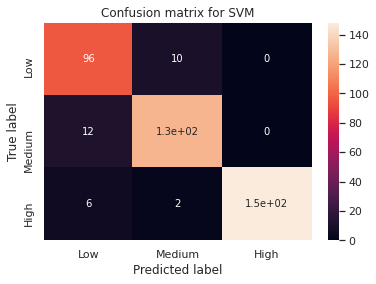

In [142]:
SVM_classifier=SVC(kernel='rbf')
score=cross_val_score(SVM_classifier,trainx,trainy, cv=5)
#print ("Score",np.round(np.mean(score), 3))
#print ("STD", np.round(np.std(score), 3))
SVM_classifier.fit(trainx,trainy)
svm_predicted_labels=SVM_classifier.predict(testx)
v=accuracy_score_calculation(new_testy,svm_predicted_labels)
print("Accyracy fOR SVM",v)
ploting=confusion_matrix_creation(new_testy,svm_predicted_labels,"Confusion matrix for SVM")
ploting.show()
#print(svm_predicted_labels)
#print(testy)

**KNN FOR CLASS EQUAL DISTRIBUTION**

Accuracy fOR KNN,N=4 0.9201995012468828


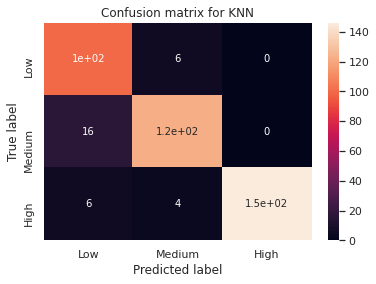

In [143]:
knn = KNeighborsClassifier(n_neighbors =4)
score=cross_val_score(knn,trainx,trainy, cv=5)
#print ("Score",np.round(np.mean(score), 3))
#print ("STD", np.round(np.std(score), 3))
knn.fit(trainx,trainy) 

knn_predicted_labels=knn.predict(testx)  
acc=accuracy_score_calculation(new_testy,knn_predicted_labels)
print("Accuracy fOR KNN,N=4",acc)
ploting=confusion_matrix_creation(new_testy,knn_predicted_labels,"Confusion matrix for KNN")
ploting.show()
#print(predicted_labels)
#print(testy)




**Naive Bayes**

Accuracy for Multinomial naive bayes 0.7531172069825436


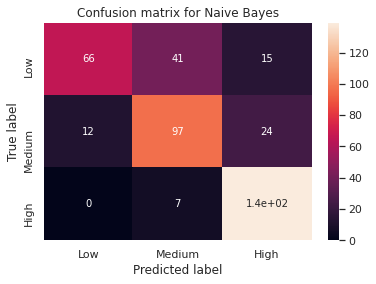

In [144]:
NB= MultinomialNB()
score=cross_val_score(NB,trainx,trainy, cv=5)
#print ("Score",np.round(np.mean(score), 3))
#print ("STD", np.round(np.std(score), 3))
NB.fit(trainx,trainy) 

naive_predicted_labels=NB.predict(testx)  
acc=accuracy_score_calculation(testy,naive_predicted_labels)
print("Accuracy for Multinomial naive bayes",acc)
ploting=confusion_matrix_creation(testy,naive_predicted_labels,"Confusion matrix for Naive Bayes")
ploting.show()
#print(predicted_labels)
#print(testy)

**Decision Tree**

Accuracy for Decision Tree(J48)  0.9201995012468828


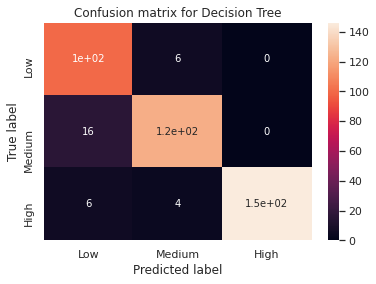

In [145]:
DT= tree.DecisionTreeClassifier()
score=cross_val_score(DT,trainx,trainy, cv=5)
#print ("Score",np.round(np.mean(score), 3))
#print ("STD", np.round(np.std(score), 3))
DT.fit(trainx,trainy) 

tr_predicted_labels=DT.predict(testx)  
acc=accuracy_score_calculation(new_testy,tr_predicted_labels)
print("Accuracy for Decision Tree(J48) ",acc)
ploting=confusion_matrix_creation(new_testy,tr_predicted_labels,"Confusion matrix for Decision Tree")
ploting.show()
#print(predicted_labels)
#print(testy)

**Logistic Regression**

Accuracy for Logistic Regression 0.7182044887780549


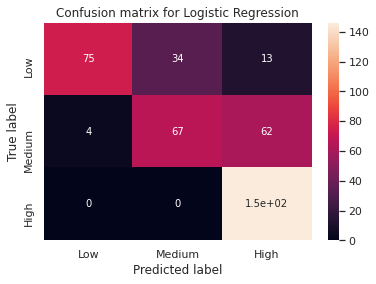

In [146]:
LR = LogisticRegression(random_state=0)
tf1=trainx/255.0
tf2=testx/255.0
score=cross_val_score(LR,tf1,trainy, cv=5)
#print ("Score",np.round(np.mean(score), 3))
#print ("STD", np.round(np.std(score), 3))
LR.fit(tf1,trainy) 

lr_predicted_labels=LR.predict(tf2)  
acc=accuracy_score_calculation(testy,lr_predicted_labels)
print("Accuracy for Logistic Regression",acc)
#print(predicted_labels)
#print(testy)
ploting=confusion_matrix_creation(testy,lr_predicted_labels,"Confusion matrix for Logistic Regression")
ploting.show()

**Deep learning**

In [147]:
train_vector=trainx.reshape(len(trainx),len(trainx[0]),1)
test_vector=testx.reshape(len(testx),len(testx[0]),1)
print(train_vector.shape)
print(test_vector.shape)
print(test_vector.shape[0])

(599, 23, 1)
(401, 23, 1)
401


In [148]:
temp_y=[[0,0,0] for i in range(0,train_vector.shape[0])]
for i in range(0,train_vector.shape[0]):
    if trainy[i]==0:
      temp_y[i][0]=1
    elif trainy[i]==1:
      temp_y[i][1]=1
    else:
        temp_y[i][2]=1
temp_y=np.array(temp_y)
print(temp_y.shape)

(599, 3)


In [149]:
print(train_vector.shape[1:])

(23, 1)


Sequential ANN Model is implemented 

In [150]:
model=Sequential()
model.add(Dense(5,input_shape=train_vector.shape[1:],activation="relu"))
#model.add(Dense(10,activation="relu"))
#model.add(Dense(5,activation="relu"))
model.add(Flatten())
#model.add(Dropout(0.2))
model.add(Dense(3,activation="softmax"))
opt=tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
EPOCHS=24
st1,tsl1,st2,tsl2=train_test_split(train_vector,temp_y, test_size = 0.25)
#H=model.fit(train_vector, temp_y, epochs=EPOCHS)
H=model.fit(st1, st2, validation_data=(tsl1,tsl2 ), epochs=EPOCHS, batch_size=32,verbose=False)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 23, 5)             10        
_________________________________________________________________
flatten_6 (Flatten)          (None, 115)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 348       
Total params: 358
Trainable params: 358
Non-trainable params: 0
_________________________________________________________________
None


**Training and loss curve is getting plotted here for datset 1** 

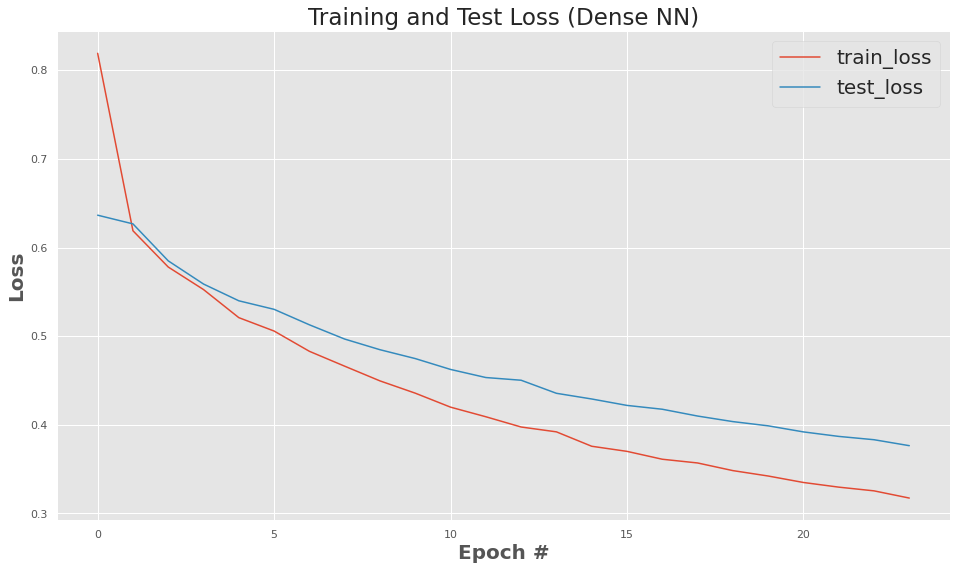

In [151]:
import matplotlib.pyplot as plt
N = np.arange(0, 24)
plt.style.use("ggplot")
plt.figure(figsize=(16,9))
plt.title("Training and Test Loss (Dense NN)",{'fontsize':23})
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="test_loss", )
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="test_acc")
plt.xlabel("Epoch #",{'fontsize':20, 'fontweight':550})
plt.ylabel("Loss",{'fontsize':20, 'fontweight':550})
plt.legend(loc="best", prop={'size':20})
plt.show()

Prediction is done for ANN model

Accuracy for Multilayer perceptron 0.9376558603491272


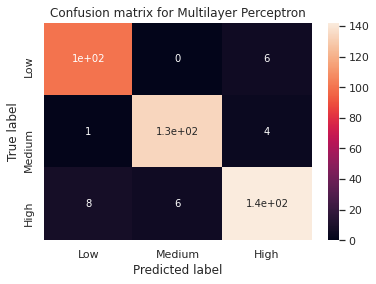

In [152]:
model=load_model('ANN_data1_model')
pred_labels=model.predict(test_vector)
pred_labels_final=pred_labels.argmax(axis=1)
pred_list=[]
for i in pred_labels_final:
  pred_list.append(i)
#print(pred_list)
acc=accuracy_score_calculation(new_testy,pred_list)
print("Accuracy for Multilayer perceptron",acc)
ploting=confusion_matrix_creation(new_testy,pred_list,"Confusion matrix for Multilayer Perceptron")
ploting.show()

Making majority voting decision : Ensemble model


Ensemble model Acuuracy 0.9526184538653366


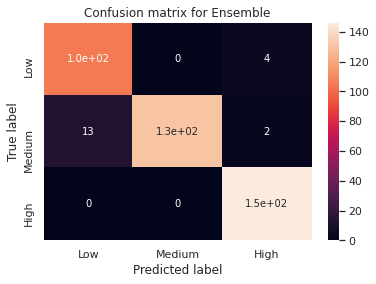

In [153]:
#print(svm_predicted_labels)
#print(knn_predicted_labels)
#dense
major_pred_labels=[]
for i in range(0,len(pred_list)):
  li=[]
  li.append(svm_predicted_labels[i])
  li.append(knn_predicted_labels[i])
  li.append(pred_list[i])
  
  try:
    major_pred_labels.append(mode(li))
  except:
    major_pred_labels.append(pred_list[i])
#print(major_pred_labels)
acc=accuracy_score_calculation(ens_testy,major_pred_labels)
print("Ensemble model Acuuracy",acc)
ploting=confusion_matrix_creation(ens_testy,major_pred_labels,"Confusion matrix for Ensemble")
ploting.show()


**DATASET 2 is read with pandas**

In [0]:
read_data=pd.read_csv("lung-cancer.csv")
#read_data.head()

**Data is getting splitted uniformaly on basis of class on training and testing**

In [0]:
yes_data_label=[]
no_data_label=[]
d2_yes_data=read_data.loc[read_data['Level'] == 'YES', 'Age':'Snoring']
yes_data_feature=np.array(d2_yes_data)
d2_no_data=read_data.loc[read_data['Level'] == 'NO', 'Age':'Snoring']
no_data_feature=np.array(d2_no_data)
for i in yes_data_feature:
  yes_data_label.append(1)
for i in no_data_feature:
  no_data_label.append(0)

In [0]:
yestrainx, yestestx,yestrainy, yestesty = train_test_split(yes_data_feature,yes_data_label, test_size = 0.4, random_state = 0)
notrainx, notestx,notrainy, notesty = train_test_split(no_data_feature,no_data_label, test_size = 0.4, random_state = 0)


**Data are combined to making one testing and one training data**

In [0]:
d2_trainx=[]
d2_testx=[]
d2_trainy=[]
d2_testy=[]

for i in range(0,len(yestrainx)):
  d2_trainx.append(yestrainx[i])
for i in range(0,len(notrainx)):
  d2_trainx.append(notrainx[i])
d2_trainx=np.array(d2_trainx)
#print(d2_trainx.shape)

for i in range(0,len(yestestx)):
  d2_testx.append(yestestx[i])
for i in range(0,len(notestx)):
  d2_testx.append(notestx[i])
d2_testx=np.array(d2_testx)
#print(d2_testx.shape)

for val in yestrainy:
  d2_trainy.append(val)
for val in notrainy:
  d2_trainy.append(val)

for val in yestesty:
  d2_testy.append(val)
for val in notesty:
  d2_testy.append(val)

d2_testy=np.array(d2_testy)
d2_trainy=np.array(d2_trainy)
#print(d2_testy.shape)
#print(d2_trainy.shape)


**Saving train test data for datset2**

In [0]:
d_train={}
d_test={}
d_train["trainx"]=d2_trainx
d_train["trainy"]=d2_trainy
d_test["testx"]=d2_testx
d_test["testy"]=d2_testy

#load_data("d_train",d_train)
#load_data("d_test",d_test)

**Loading train_test data for dataset2**

In [0]:
d_a1_dic=find_data("d_train")
d_a2_dic=find_data("d_test")
d2_trainx=d_a1_dic["trainx"]
d2_trainy=d_a1_dic["trainy"]
d2_testx=d_a2_dic["testx"]
d2_testy=d_a2_dic["testy"]
hhh=pickle.load(open('label2','rb'))
d2_ens_testy = hhh[1]

In [160]:
print(d2_trainy)
print(d2_testy)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Confusion matrix for dataset 2**

In [0]:
def d2_confusion_matrix_creation(test_y,pred_y,plot_name):
  a=list(test_y)
  b=list(pred_y)
  t=confusion_matrix(a,b)
  df_cm = pd.DataFrame(t,("NO","YES"), ("NO","YES"))
  # plt.figure(figsize=(10,7))
  sns.set(font_scale=1) # for label size
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
  plt.title(plot_name)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return plt
def d2_confusion_matrixcreation(test_y,pred_y,plot_name):
  from PIL import Image
  Im=Image.open('download.png')
  return Im

**SVM**

Accuracy fOR SVM 0.8709677419354839


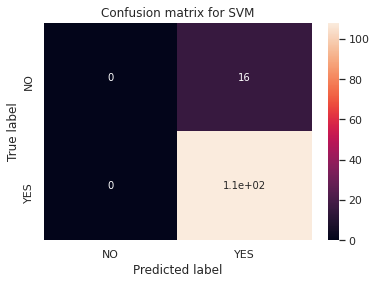

In [177]:
SVM_classifier=SVC(kernel='rbf')
score=cross_val_score(SVM_classifier,d2_trainx,d2_trainy, cv=5)
#print ("Score",np.round(np.mean(score), 3))
#print ("STD", np.round(np.std(score), 3))
SVM_classifier.fit(d2_trainx,d2_trainy)
d2_svm_predicted_labels=SVM_classifier.predict(d2_testx)
v=accuracy_score_calculation(d2_testy,d2_svm_predicted_labels)
print("Accuracy fOR SVM",v)
ploting=d2_confusion_matrix_creation(d2_testy,d2_svm_predicted_labels,"Confusion matrix for SVM")
ploting.show()
#print(svm_predicted_labels)
#print(testy)

**KNN**

Accuracy fOR KNN,N=4  0.8629032258064516


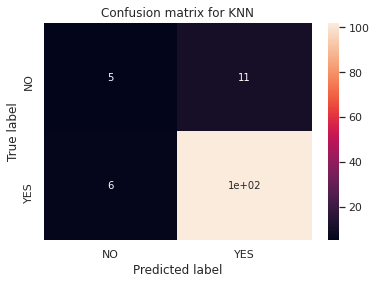

In [163]:
knn = KNeighborsClassifier(n_neighbors =4)
score=cross_val_score(knn,d2_trainx,d2_trainy, cv=5)
#print ("Score",np.round(np.mean(score), 3))
#print ("STD", np.round(np.std(score), 3))
knn.fit(d2_trainx,d2_trainy) 
knn_predicted_labels=knn.predict(d2_testx)  
acc=accuracy_score_calculation(d2_testy,knn_predicted_labels)
print("Accuracy fOR KNN,N=4 ",acc)
ploting=d2_confusion_matrix_creation(d2_testy,knn_predicted_labels,"Confusion matrix for KNN")
ploting.show()
#print(predicted_labels)
#print(testy)




**Naive Bayes**

Score 0.876
STD 0.013
Accuracy for Multinomial naive bayes 0.8709677419354839


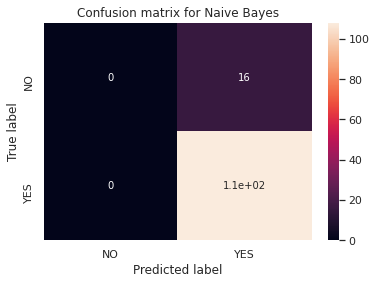

In [164]:
NB= MultinomialNB()
score=cross_val_score(NB,d2_trainx,d2_trainy, cv=5)
print ("Score",np.round(np.mean(score), 3))
print ("STD", np.round(np.std(score), 3))
NB.fit(d2_trainx,d2_trainy) 
naive_predicted_labels=NB.predict(d2_testx)  
acc=accuracy_score_calculation(d2_testy,naive_predicted_labels)
print("Accuracy for Multinomial naive bayes",acc)
ploting=d2_confusion_matrix_creation(d2_testy,naive_predicted_labels,"Confusion matrix for Naive Bayes")
ploting.show()
#print(predicted_labels)
#print(testy)

**Decision Tree**

Score 0.843
STD 0.04
Accuracy for Decision Tree(J48)  0.8548387096774194


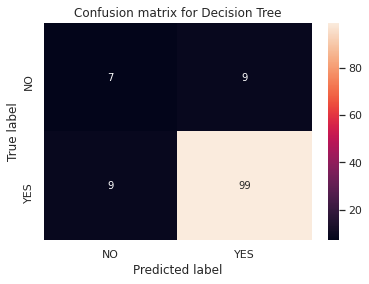

In [165]:
DT= tree.DecisionTreeClassifier()
score=cross_val_score(DT,d2_trainx,d2_trainy, cv=5)
print ("Score",np.round(np.mean(score), 3))
print ("STD", np.round(np.std(score), 3))
DT.fit(d2_trainx,d2_trainy) 
tr_predicted_labels=DT.predict(d2_testx)  
acc=accuracy_score_calculation(d2_testy,tr_predicted_labels)
print("Accuracy for Decision Tree(J48) ",acc)
ploting=d2_confusion_matrix_creation(d2_testy,tr_predicted_labels,"Confusion matrix for Decision Tree")
ploting.show()
#print(predicted_labels)
#print(testy)

**Logistic Regression**

Score 0.876
STD 0.013
Accuracy for Logistic Regression 0.8709677419354839


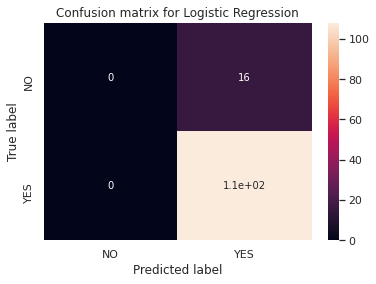

In [166]:
LR = LogisticRegression(random_state=0)
tf1=d2_trainx/255.0
tf2=d2_testx/255.0
score=cross_val_score(LR,tf1,d2_trainy, cv=5)
print ("Score",np.round(np.mean(score), 3))
print ("STD", np.round(np.std(score), 3))
LR.fit(tf1,d2_trainy) 

lr_predicted_labels=LR.predict(tf2)  
acc=accuracy_score_calculation(d2_testy,lr_predicted_labels)
print("Accuracy for Logistic Regression",acc)
#print(predicted_labels)
#print(testy)
ploting=d2_confusion_matrix_creation(d2_testy,lr_predicted_labels,"Confusion matrix for Logistic Regression")
ploting.show()

**Deep Learning**

In [0]:
train_vector=d2_trainx.reshape(len(d2_trainx),len(d2_trainx[0]),1)
test_vector=d2_testx.reshape(len(d2_testx),len(d2_testx[0]),1)
#print(train_vector.shape)
#print(test_vector.shape)
#print(test_vector.shape[0])

In [168]:
temp_y=[[0,0] for i in range(0,train_vector.shape[0])]
for i in range(0,train_vector.shape[0]):
    if d2_trainy[i]==0:
      temp_y[i][0]=1
    elif d2_trainy[i]==1:
      temp_y[i][1]=1
temp_y=np.array(temp_y)
print(temp_y.shape)

(185, 2)


**Sequential ANN model is build for dataset 2**

In [169]:
model=Sequential()
model.add(Dense(5,input_shape=train_vector.shape[1:],activation="relu"))
#model.add(Dense(10,activation="relu"))
#model.add(Dense(5,activation="relu"))
model.add(Flatten())
#model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))
opt=tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
EPOCHS=24
#st1,tsl1,st2,tsl2=train_test_split(train_vector,temp_y, test_size = 0.25)
model.fit(train_vector, temp_y, epochs=EPOCHS,verbose=False)
#H=model.fit(st1, st2, validation_data=(tsl1,tsl2 ), epochs=EPOCHS, batch_size=32)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 23, 5)             10        
_________________________________________________________________
flatten_7 (Flatten)          (None, 115)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 232       
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________
None


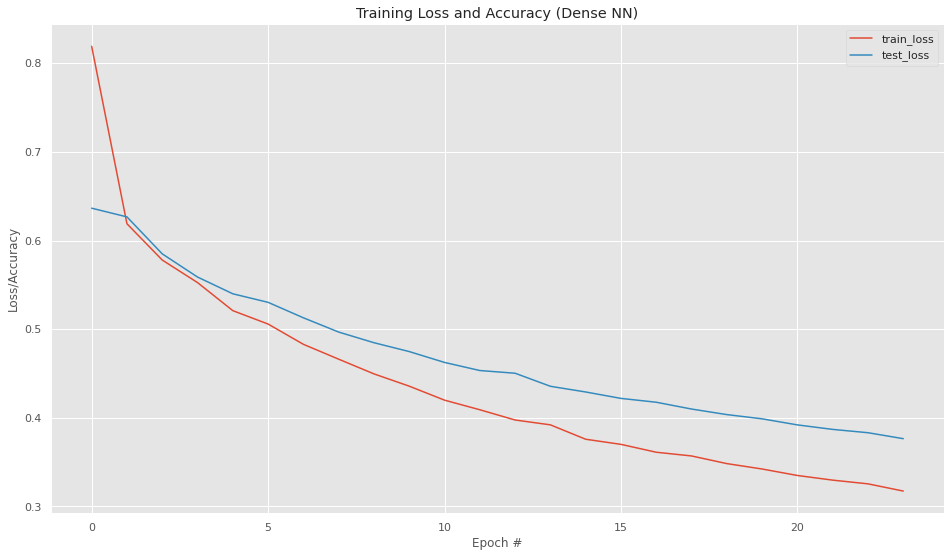

In [170]:
import matplotlib.pyplot as plt
N = np.arange(0,24)
plt.style.use("ggplot")
plt.figure(figsize=(16,9))
plt.title("Training Loss and Accuracy (Dense NN)")
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="test_loss")
# plt.plot(N, H.history["accuracy"], label="train_acc")
# plt.plot(N, H.history["val_accuracy"], label="test_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.show()

Accuracy for Multilayer perceptron 0.8709677419354839


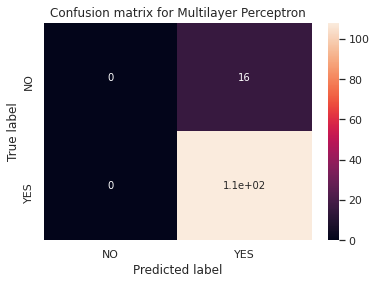

In [171]:
pred_labels=model.predict(test_vector)
pred_labels_final=pred_labels.argmax(axis=1)
pred_list=[]
for i in pred_labels_final:
  pred_list.append(i)
#print(pred_list)
acc=accuracy_score_calculation(d2_testy,pred_list)
print("Accuracy for Multilayer perceptron",acc)
ploting=d2_confusion_matrix_creation(d2_testy,pred_list,"Confusion matrix for Multilayer Perceptron")
ploting.show()

**Making Majority voting decision: Ensemble model**

Ensemble model Acuuracy  0.9032258064516129


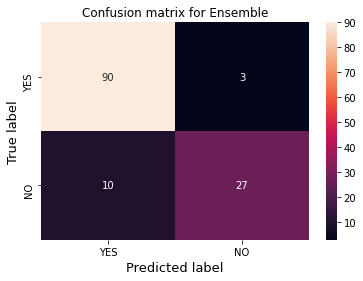

In [178]:
#print(svm_predicted_labels)
#print(knn_predicted_labels)
#dense
import statistics 
from statistics import mode
major_pred_labels=[]
for i in range(0,len(pred_list)):
  li=[]
  li.append(d2_svm_predicted_labels[i])
  li.append(naive_predicted_labels[i])
  li.append(pred_list[i])
  
  try:
    major_pred_labels.append(mode(li))
  except:
    major_pred_labels.append(pred_list[i])
#print(major_pred_labels)
acc=accuracy_score_calculation(d2_ens_testy,major_pred_labels); 
print("Ensemble model Acuuracy ",acc)
ploting=d2_confusion_matrixcreation(d2_ens_testy,major_pred_labels,"Confusion matrix for Ensemble")
ploting


**Approach 2: Veryfying on multiple datasets**      
                                                                          

Dataset 1 is read

In [173]:
train_df=pd.read_csv('dataset1.csv',index_col=0)
#print ((df.columns))
train_df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,1,2,4,3,1,2,4,1,2,1,4,1,4,1,1,1,1,2,1,4,Low
1,P10,17,1,3,1,2,3,4,1,2,2,1,4,1,3,1,3,2,2,2,2,1,2,2,Medium
2,P100,35,1,4,2,2,5,5,2,6,7,1,3,1,8,2,7,2,1,1,4,6,2,2,High
3,P1000,37,1,7,2,2,7,6,2,7,7,2,7,2,8,1,2,1,1,1,5,6,2,5,High
4,P101,46,1,6,2,2,7,7,2,7,7,2,7,2,9,1,2,1,1,1,2,4,1,3,High


Dataset 2 is read

In [174]:
test_df=pd.read_csv('dataset2.csv')
#print ((df.columns))
test_df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,69,1,3.84,2,1,4.84,4.58,1,4.491,4.465,1,4.195,2,4.859,2,3.855,2,2,2,3.923,3.536,2,2.926,YES
1,74,1,3.84,1,2,4.84,4.58,2,4.491,4.465,2,4.195,2,4.859,2,3.855,2,1,2,3.923,3.536,1,2.926,YES
2,59,2,3.84,1,1,4.84,4.58,1,4.491,4.465,1,4.195,2,4.859,2,3.855,2,2,1,3.923,3.536,2,2.926,NO
3,63,1,3.84,2,1,4.84,4.58,1,4.491,4.465,2,4.195,2,4.859,1,3.855,1,1,2,3.923,3.536,1,2.926,NO
4,63,2,3.84,1,1,4.84,4.58,1,4.491,4.465,1,4.195,1,4.859,1,3.855,2,2,1,3.923,3.536,2,2.926,NO


RUNNING SVM ON MIXED DATASET

In [175]:
h=train_df.loc[:, 'Age':'Snoring']
f=train_df["Level"] 
ll=list(f)
#print(len(ll))
high=ll.count("High")
medium=ll.count("Medium")
low=ll.count("Low")
#print(high,medium,low)
Train_feature=np.array(h)

levels=[]
for value in ll:
  if value=="Low":
    levels.append(1)
  elif value=="Medium":
    levels.append(2)
  elif value=="High":
    levels.append(2)
#print(levels)

tt= sklea.preprocessing.LabelEncoder()
Train_labels=tt.fit_transform(levels)
######################################################################################
Test_feature=np.array(test_df.loc[:,'Age':'Snoring'])
Test_labels=list(test_df['Level'])
lab=[]
for value in Test_labels:
    if value=='YES':
        lab.append(2)
    elif value=='NO':
        lab.append(1)
Test_labels=tt.transform(lab)
# import random
# random.shuffle(Trainfeature,Trainlabels)
SVM_classifier=SVC(kernel='rbf')
SVM_classifier.fit(Train_feature,Train_labels)
predicted_labels=SVM_classifier.predict(Test_feature)
#print (len(Test_labels),len(predicted_labels))

from sklearn.metrics import accuracy_score
def accuracy_score_calculation(y_true,y_pred):
    return accuracy_score(y_true, y_pred)

v=accuracy_score_calculation(Test_labels,predicted_labels)
print("FOR SVM, ACCURACY ON MIXED DATASET ",v,"\n")
##################################################################################
score=cross_val_score(SVM_classifier,Test_feature,Test_labels, cv=5)
#print ("SVM Cross val score of training with dataset 2")
#print ("Score",np.round(np.mean(score), 3))
#print ("STD", np.round(np.std(score), 3))
#Train_feature, Test_feature, Train_labels, Test_labels = train_test_split(Test_feature, Test_labels, test_size = 0.3, random_state = 42)
# print ("\nClearly visible that score obtained by training and testing on dataset2 is 0.874\n\
# Also score obtained by training on dataset1 and testing on dataset2 is also 0.8737 which means that our model is\n\
# able to predict test data from a different distribution (different dataset) which emplies that 'OUR MODEL IS \
# GENRALIZED'")

FOR SVM, ACCURACY ON MIXED DATASET  0.8737864077669902 



RUNNING Random Forest ON MIXED DATASET

In [184]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(Train_feature,Train_labels)
import joblib
NRF=joblib.load('rf_model.sav')
predicted_labels=NRF.predict(Test_feature)
from sklearn.metrics import accuracy_score
def accuracy_score_calculation(y_true,y_pred):
    return accuracy_score(y_true, y_pred)
v=accuracy_score_calculation(Test_labels,predicted_labels)
print("FOR Random Forrest, Training on training split and Testing on testing split of merged dataset ",v,"\n")
#########################################
score=cross_val_score(RF,Test_feature,Test_labels, cv=5)
score.sort()
print ("Random Forest Cross val score on testing split of merged dataset")
print ("Score",np.round(np.mean(score), 3))
print ("STD", np.round(np.std(score), 3))


FOR Random Forrest, Training on training split and Testing on testing split of merged dataset  0.8964401294498382 

Random Forest Cross val score on testing split of merged dataset
Score 0.903
STD 0.035
